# Python data structures demo

## Text analysis and generation

In [1]:
import urllib.request

md_url = 'https://www.gutenberg.org/files/2701/2701-0.txt'
md_text = urllib.request.urlopen(md_url).read().decode()
#opens that site, reads it binarily, n the decode it n refer it to a variable 

In [3]:
md_text[:100] #first 100 words of the file

'\ufeff\r\nThe Project Gutenberg EBook of Moby Dick; or The Whale, by Herman\r\nMelville\r\n\r\nThis eBook is for '

In [4]:
idx = md_text.index('Call me Ishmael') #first line of the first ch

In [6]:
idx #the index of the first line we searched for just now

28652

In [9]:
md_text[idx:idx+100] #give me the first character to the next 100 characters from the start of the index we jsut searched up

'Call me Ishmael. Some years ago—never mind how long precisely—having\r\nlittle or no money in my purse'

In [8]:
md_text[idx:idx+100].split()
#split gives u the individual words in the book in the first 100 characters

['Call',
 'me',
 'Ishmael.',
 'Some',
 'years',
 'ago—never',
 'mind',
 'how',
 'long',
 'precisely—having',
 'little',
 'or',
 'no',
 'money',
 'in',
 'my',
 'purse']

In [10]:
md_words = md_text.lower().split()

In [11]:
len(md_words)

215830

In [13]:
md_words_uniq = set(md_words)
len(md_words_uniq) #to find the amount of unique words in the text

31830

In [15]:
# compute the frequency of each word in the text
md_word_counts = {} #create a dict, maps aw ord to the amount of times it's used in the text
for w in md_words:
    if w not in md_word_counts:
        md_word_counts[w] = 1 #give it one to mean to appeared for the first time 
    else:
        md_word_counts[w] += 1 #increase count by 1

In [16]:
md_word_counts['the']

14500

In [17]:
len(md_word_counts) #same as len(md_words) bc md_words is set, so uniqueness alreaady

31830

In [18]:
list(md_word_counts.items())[:10]

[('\ufeff', 1),
 ('the', 14500),
 ('project', 86),
 ('gutenberg', 23),
 ('ebook', 8),
 ('of', 6678),
 ('moby', 82),
 ('dick;', 11),
 ('or', 776),
 ('whale,', 213)]

In [19]:
md_word_counts_sorted = sorted(md_word_counts.items())
#sorted is like list.sort but it returns a new list 
#sorting least to greatest based on the keys 

In [20]:
md_word_counts_sorted[:10]

[('#2701]', 1),
 ('$20,000,000!', 1),
 ('$5,000)', 1),
 ('$7,000,000.', 1),
 ('&', 2),
 ('($1', 1),
 ('(1775)', 1),
 ('(801)', 1),
 ('(_a', 1),
 ('(_advancing_).', 1)]

In [23]:
md_word_counts_sorted = sorted(md_word_counts.items() , key = lambda t: t[1], reverse=True)

In [25]:
md_word_counts_sorted[:10]
#now sorts the list based on the second item in the tuple

[('the', 14500),
 ('of', 6678),
 ('and', 6324),
 ('a', 4663),
 ('to', 4597),
 ('in', 4122),
 ('that', 2749),
 ('his', 2485),
 ('it', 1776),
 ('with', 1750)]

In [37]:
import urllib.request

sw_url = 'https://moss.cs.iit.edu/stopwords.txt'
sw_text = urllib.request.urlopen(sw_url).read().decode()
stopwords = sw_text.split()

In [38]:
stopwords[:10]

['a', 'about', 'above', 'after', 'again', 'against', 'all', 'am', 'an', 'and']

In [42]:
# remove stopwords
#set of words in md n set of stop words, but we want a dictionary back
# so we want to create a dictionary n all the values associated with those key

md_word_counts = { k : md_word_counts[k] for k in set(md_word_counts) - set(stopwords)}






In [43]:
md_word_counts_sorted = sorted(md_word_counts.items(), key=lambda t: t[1], reverse=True)

In [44]:
md_word_counts_sorted[:10]

[]

ValueError: shape mismatch: objects cannot be broadcast to a single shape

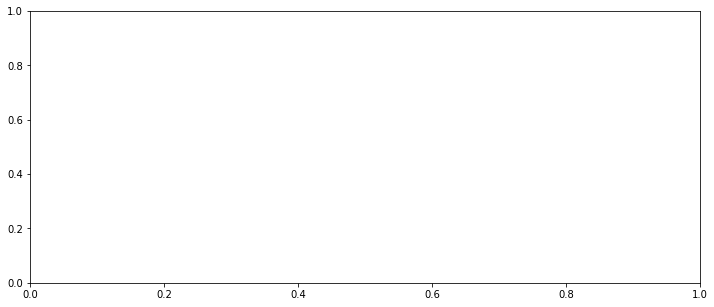

In [45]:
%matplotlib inline
import matplotlib.pyplot as plt

# need lists of the first n words/counts to plot
n = 20
words  = [t[0] for t in md_word_counts_sorted[:n]]
counts = [t[1] for t in md_word_counts_sorted[:n]]

plt.rcParams['figure.figsize'] = [12, 5]
plt.bar(range(n), counts)
plt.xticks(range(n), words, rotation=60, fontsize=12)
plt.show()

In [47]:
# collect all two-word phrases as tuples
phrases = []
for i in range(len(md_words)-1):
    phrases.append(md_words[i:i+2]) #slice method 

In [48]:
phrases[:10]

[['\ufeff', 'the'],
 ['the', 'project'],
 ['project', 'gutenberg'],
 ['gutenberg', 'ebook'],
 ['ebook', 'of'],
 ['of', 'moby'],
 ['moby', 'dick;'],
 ['dick;', 'or'],
 ['or', 'the'],
 ['the', 'whale,']]

In [51]:
# map each word to a list of all the words that
# follow it in the text
phrase_dict = {}
for (w1, w2) in phrases: #w1 n w2 take in the values in the lists above
    if w1 not in phrase_dict:
        phrase_dict[w1] = [w2] #if key is not made, create it with w2
    else:
        phrase_dict[w1].append(w2) #otherwise add w2 to the list of w1

In [52]:
phrase_dict['starboard']

['hand',
 'hand',
 'fluke—look',
 'quarter.',
 'gunwale',
 'bow,',
 'side,',
 'fin.',
 'bow,',
 'side,',
 'fin.”',
 'and',
 'bow,']

In [57]:
import random
random.choice(['hello', 'how'])

'hello'

In [67]:
# generate a sentence based on two-word phrase statistics
# from Moby Dick
import random

gen_words = ['whale']
for _ in range(10):
    words = phrase_dict[gen_words[-1]] #list of all words that could come after the last of my sentence
    gen_words.append(random.choice(words))

' '.join(gen_words)

'whale be said bildad, if hereafter be free to do me'

### Solving Sudoku

In [68]:
puzzle = '''..3 .2. 6..
            9.. 3.5 ..1
            ..1 8.6 4..
            
            ..8 1.2 9..
            7.. ... ..8
            ..6 7.8 2..
            
            ..2 6.9 5..
            8.. 2.3 ..9
            ..5 .1. 3..
            '''

In [71]:
# name all the squares in the game
rows = 'ABCDEFGHI'
cols = '123456789'
squares = [r+c for r in rows for c in cols] #gives me A1, A2, etc

In [72]:
def parse_puzzle(puz_str):
    puzzle = [c if c in '123456789' else None
              for c in puz_str if c not in ' \n']
#check to see if c is in that string of numbers 
    return {squares[i]: puzzle[i]
            for i in range(0, len(squares))}

In [73]:
parse_puzzle(puzzle) #map every equare name to each puzzle place

{'A1': None,
 'A2': None,
 'A3': '3',
 'A4': None,
 'A5': '2',
 'A6': None,
 'A7': '6',
 'A8': None,
 'A9': None,
 'B1': '9',
 'B2': None,
 'B3': None,
 'B4': '3',
 'B5': None,
 'B6': '5',
 'B7': None,
 'B8': None,
 'B9': '1',
 'C1': None,
 'C2': None,
 'C3': '1',
 'C4': '8',
 'C5': None,
 'C6': '6',
 'C7': '4',
 'C8': None,
 'C9': None,
 'D1': None,
 'D2': None,
 'D3': '8',
 'D4': '1',
 'D5': None,
 'D6': '2',
 'D7': '9',
 'D8': None,
 'D9': None,
 'E1': '7',
 'E2': None,
 'E3': None,
 'E4': None,
 'E5': None,
 'E6': None,
 'E7': None,
 'E8': None,
 'E9': '8',
 'F1': None,
 'F2': None,
 'F3': '6',
 'F4': '7',
 'F5': None,
 'F6': '8',
 'F7': '2',
 'F8': None,
 'F9': None,
 'G1': None,
 'G2': None,
 'G3': '2',
 'G4': '6',
 'G5': None,
 'G6': '9',
 'G7': '5',
 'G8': None,
 'G9': None,
 'H1': '8',
 'H2': None,
 'H3': None,
 'H4': '2',
 'H5': None,
 'H6': '3',
 'H7': None,
 'H8': None,
 'H9': '9',
 'I1': None,
 'I2': None,
 'I3': '5',
 'I4': None,
 'I5': '1',
 'I6': None,
 'I7': '3',
 'I8'

In [79]:
# what squares fall in the same columns? (list of lists)
# keep cols constant but alter rows
vert_units = [[r+c for r in rows] for c in cols]

In [80]:
vert_units

[['A1', 'B1', 'C1', 'D1', 'E1', 'F1', 'G1', 'H1', 'I1'],
 ['A2', 'B2', 'C2', 'D2', 'E2', 'F2', 'G2', 'H2', 'I2'],
 ['A3', 'B3', 'C3', 'D3', 'E3', 'F3', 'G3', 'H3', 'I3'],
 ['A4', 'B4', 'C4', 'D4', 'E4', 'F4', 'G4', 'H4', 'I4'],
 ['A5', 'B5', 'C5', 'D5', 'E5', 'F5', 'G5', 'H5', 'I5'],
 ['A6', 'B6', 'C6', 'D6', 'E6', 'F6', 'G6', 'H6', 'I6'],
 ['A7', 'B7', 'C7', 'D7', 'E7', 'F7', 'G7', 'H7', 'I7'],
 ['A8', 'B8', 'C8', 'D8', 'E8', 'F8', 'G8', 'H8', 'I8'],
 ['A9', 'B9', 'C9', 'D9', 'E9', 'F9', 'G9', 'H9', 'I9']]

In [81]:
# what squares fall in the same rows? (list of lists)
#keep rows constant but alter cols
horiz_units = [[r+c for c in cols] for r in rows]

In [92]:
horiz_units

[]

In [93]:
# what squares fall in the same "boxes"? (list of lists)
box_units = [[r+c for r in rs for c in cs]
             for rs in ('ABC', 'DEF', 'GHI')
             for cs in ('123', '456', '789')]

In [87]:
box_units

[['A1', 'A2', 'A3', 'B1', 'B2', 'B3', 'C1', 'C2', 'C3'],
 ['A4', 'A5', 'A6', 'B4', 'B5', 'B6', 'C4', 'C5', 'C6'],
 ['A7', 'A8', 'A9', 'B7', 'B8', 'B9', 'C7', 'C8', 'C9'],
 ['D1', 'D2', 'D3', 'E1', 'E2', 'E3', 'F1', 'F2', 'F3'],
 ['D4', 'D5', 'D6', 'E4', 'E5', 'E6', 'F4', 'F5', 'F6'],
 ['D7', 'D8', 'D9', 'E7', 'E8', 'E9', 'F7', 'F8', 'F9'],
 ['G1', 'G2', 'G3', 'H1', 'H2', 'H3', 'I1', 'I2', 'I3'],
 ['G4', 'G5', 'G6', 'H4', 'H5', 'H6', 'I4', 'I5', 'I6'],
 ['G7', 'G8', 'G9', 'H7', 'H8', 'H9', 'I7', 'I8', 'I9']]

In [88]:
all_units = vert_units + horiz_units + box_units

In [89]:
all_units

[['A1', 'B1', 'C1', 'D1', 'E1', 'F1', 'G1', 'H1', 'I1'],
 ['A2', 'B2', 'C2', 'D2', 'E2', 'F2', 'G2', 'H2', 'I2'],
 ['A3', 'B3', 'C3', 'D3', 'E3', 'F3', 'G3', 'H3', 'I3'],
 ['A4', 'B4', 'C4', 'D4', 'E4', 'F4', 'G4', 'H4', 'I4'],
 ['A5', 'B5', 'C5', 'D5', 'E5', 'F5', 'G5', 'H5', 'I5'],
 ['A6', 'B6', 'C6', 'D6', 'E6', 'F6', 'G6', 'H6', 'I6'],
 ['A7', 'B7', 'C7', 'D7', 'E7', 'F7', 'G7', 'H7', 'I7'],
 ['A8', 'B8', 'C8', 'D8', 'E8', 'F8', 'G8', 'H8', 'I8'],
 ['A9', 'B9', 'C9', 'D9', 'E9', 'F9', 'G9', 'H9', 'I9'],
 ['A1', 'A2', 'A3', 'B1', 'B2', 'B3', 'C1', 'C2', 'C3'],
 ['A4', 'A5', 'A6', 'B4', 'B5', 'B6', 'C4', 'C5', 'C6'],
 ['A7', 'A8', 'A9', 'B7', 'B8', 'B9', 'C7', 'C8', 'C9'],
 ['D1', 'D2', 'D3', 'E1', 'E2', 'E3', 'F1', 'F2', 'F3'],
 ['D4', 'D5', 'D6', 'E4', 'E5', 'E6', 'F4', 'F5', 'F6'],
 ['D7', 'D8', 'D9', 'E7', 'E8', 'E9', 'F7', 'F8', 'F9'],
 ['G1', 'G2', 'G3', 'H1', 'H2', 'H3', 'I1', 'I2', 'I3'],
 ['G4', 'G5', 'G6', 'H4', 'H5', 'H6', 'I4', 'I5', 'I6'],
 ['G7', 'G8', 'G9', 'H7', 'H8',

In [90]:
# associate each square with a list of all the units it belongs to
#maps every square onto a list of units, where a unit is also a list
# { 'A1' : []}

units = { s: [u for u in all_units if s in u] for s in squares }

In [91]:
units['A1']

[['A1', 'B1', 'C1', 'D1', 'E1', 'F1', 'G1', 'H1', 'I1'],
 ['A1', 'A2', 'A3', 'B1', 'B2', 'B3', 'C1', 'C2', 'C3']]

In [95]:
# associate each square with the set of all its "peers" (i.e., all
# other squares that fall into one of its units)
# { 'A1' : {}}
#a set for uniqueness inside
peers = { s: set([sq for u in units[s] for sq in u]) - {s}
         for s in squares}

In [96]:
peers['A1']

{'A2',
 'A3',
 'B1',
 'B2',
 'B3',
 'C1',
 'C2',
 'C3',
 'D1',
 'E1',
 'F1',
 'G1',
 'H1',
 'I1'}

In [97]:
# what is a "catch-all" solution?
sol = { s: '123456789' for s in squares}

In [98]:
sol

{'A1': '123456789',
 'A2': '123456789',
 'A3': '123456789',
 'A4': '123456789',
 'A5': '123456789',
 'A6': '123456789',
 'A7': '123456789',
 'A8': '123456789',
 'A9': '123456789',
 'B1': '123456789',
 'B2': '123456789',
 'B3': '123456789',
 'B4': '123456789',
 'B5': '123456789',
 'B6': '123456789',
 'B7': '123456789',
 'B8': '123456789',
 'B9': '123456789',
 'C1': '123456789',
 'C2': '123456789',
 'C3': '123456789',
 'C4': '123456789',
 'C5': '123456789',
 'C6': '123456789',
 'C7': '123456789',
 'C8': '123456789',
 'C9': '123456789',
 'D1': '123456789',
 'D2': '123456789',
 'D3': '123456789',
 'D4': '123456789',
 'D5': '123456789',
 'D6': '123456789',
 'D7': '123456789',
 'D8': '123456789',
 'D9': '123456789',
 'E1': '123456789',
 'E2': '123456789',
 'E3': '123456789',
 'E4': '123456789',
 'E5': '123456789',
 'E6': '123456789',
 'E7': '123456789',
 'E8': '123456789',
 'E9': '123456789',
 'F1': '123456789',
 'F2': '123456789',
 'F3': '123456789',
 'F4': '123456789',
 'F5': '123456789',


In [99]:
def assign(sol, sq, val):
    '''If assigning a value to a square, eliminate all other
    values from that square in the solution.'''
    for other in sol[sq].replace(val, ''):
        eliminate(sol, sq, other)

def eliminate(sol, sq, val):
    '''Eliminate a value from a square. Also check whether
    eliminating a value from the given square narrows down 
    that value to only one affected square; if so, assign 
    the value to that square.'''
    if val not in sol[sq]:
        return
    sol[sq] = sol[sq].replace(val, '')
    if len(sol[sq]) == 1:
        last = sol[sq][0]
        for p in peers[sq]:
            eliminate(sol, p, last)
    for u in units[sq]:
        candidates = [s for s in u if val in sol[s]]
        if len(candidates) == 1:
            assign(sol, candidates[0], val)

In [100]:
def solve_puzzle(puzz_str):
    puz = parse_puzzle(puzz_str)
    sol = {s: '123456789' for s in squares}

    for sq, val in puz.items():
        if val:
            assign(sol, sq, val)
    return sol

In [101]:
solve_puzzle(puzzle)

{'A1': '2456',
 'A2': '245678',
 'A3': '3',
 'A4': '49',
 'A5': '2',
 'A6': '1',
 'A7': '6',
 'A8': '235789',
 'A9': '2357',
 'B1': '9',
 'B2': '245678',
 'B3': '47',
 'B4': '3',
 'B5': '479',
 'B6': '5',
 'B7': '78',
 'B8': '235789',
 'B9': '1',
 'C1': '2456',
 'C2': '245678',
 'C3': '1',
 'C4': '8',
 'C5': '479',
 'C6': '6',
 'C7': '4',
 'C8': '235789',
 'C9': '2357',
 'D1': '12345',
 'D2': '123459',
 'D3': '8',
 'D4': '1',
 'D5': '3569',
 'D6': '2',
 'D7': '9',
 'D8': '134567',
 'D9': '34567',
 'E1': '7',
 'E2': '123459',
 'E3': '49',
 'E4': '59',
 'E5': '3569',
 'E6': '4',
 'E7': '17',
 'E8': '134567',
 'E9': '8',
 'F1': '12345',
 'F2': '123459',
 'F3': '6',
 'F4': '7',
 'F5': '3569',
 'F6': '8',
 'F7': '2',
 'F8': '134567',
 'F9': '34567',
 'G1': '1346',
 'G2': '134679',
 'G3': '2',
 'G4': '6',
 'G5': '458',
 'G6': '9',
 'G7': '5',
 'G8': '124678',
 'G9': '2467',
 'H1': '8',
 'H2': '134679',
 'H3': '479',
 'H4': '2',
 'H5': '458',
 'H6': '3',
 'H7': '178',
 'H8': '124678',
 'H9': 

In [102]:
def print_sol(sol):
    for r in rows:
        for c in cols:
            print('{:^6} '.format(sol[r+c]), end='')
        print()

In [103]:
print_sol(solve_puzzle(puzzle))

 2456  245678   3      49     2      1      6    235789  2357  
  9    245678   47     3     479     5      78   235789   1    
 2456  245678   1      8     479     6      4    235789  2357  
12345  123459   8      1     3569    2      9    134567 34567  
  7    123459   49     59    3569    4      17   134567   8    
12345  123459   6      7     3569    8      2    134567 34567  
 1346  134679   2      6     458     9      5    124678  2467  
  8    134679  479     2     458     3     178   124678   9    
 1346  134679   5      45     1      7      3    124678  2467  


In [104]:
# NYTimes "Medium" puzzle
print_sol(solve_puzzle('''
.51 8.. 3.6
.3. ... ...
..9 .42 .15

..4 .75 ...
3.. ... ...
.8. 9.. ...

... ... 8..
.1. ..6 .9.
..7 ... ..4
'''))

24678    5      1      8    13569   1379    3     2478    6    
24678    3     268   13567  13569   1379   2479   2478   2789  
24678   2467    9    13567    4      2     2479    1      5    
125679  2679    4    12346    7      5    1245679 2345678 123789 
  3     2679   256   12346  12368   1348  1245679 2345678 123789 
125679   8     256     9    12368   1348  1245679 2345678 123789 
245689  2469  23568  123457 123589 134789   8    23567   1237  
245689   1    23568  123457 123589   6    12567    9     1237  
245689  2469    7    123457 123589 134789 12567  23567    4    
